In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples,silhouette_score
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,accuracy_score, precision_score,f1_score
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 1 Exploratory Data Analysis

In [4]:
#extracted hour minute seconds from time within excel file. Also created weekday month Hour Recency and Day
df = pd.read_excel("Cafe_Data_MRA(1).xlsx",sheet_name='Sheet1')

In [5]:
df.head(10)

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category,Hour,Minute,Seconds,Weekday,Month,HourAP,Recency,Day
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE,13,15,0.958333,Thursday,April,1-PM,364,1
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE,13,15,0.958333,Thursday,April,1-PM,364,1
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE,13,17,35.000000,Thursday,April,1-PM,364,1
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE,13,19,55.000000,Thursday,April,1-PM,364,1
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE,1,20,18.000000,Thursday,April,1-AM,364,1
5,2010-04-01,G0470283,QUA MINERAL WATER(1000ML),01:20:18,1,50.0,11.88,0.0,61.88,BEVERAGE,1,20,18.000000,Thursday,April,1-AM,364,1
6,2010-04-01,G0470118,MASALA CHAI CUTTING,13:21:34,1,40.0,9.50,0.0,49.50,BEVERAGE,13,21,34.000000,Thursday,April,1-PM,364,1
7,2010-04-01,G0470118,MOROCCAN MINT TEA,13:21:34,1,45.0,10.69,0.0,55.69,BEVERAGE,13,21,34.000000,Thursday,April,1-PM,364,1
8,2010-04-01,G0470284,CAPPUCCINO,01:29:38,1,60.0,14.25,0.0,74.25,BEVERAGE,1,29,38.000000,Thursday,April,1-AM,364,1
9,2010-04-01,G0470285,MOROCCAN MINT TEA,01:29:46,1,45.0,10.69,0.0,55.69,BEVERAGE,1,29,46.000000,Thursday,April,1-AM,364,1


In [6]:
df.tail(10)

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category,Hour,Minute,Seconds,Weekday,Month,HourAP,Recency,Day
145820,2010-06-08,N0028991,ZINZI WHITE (GLS),01:09:11,2,150.0,78.0,0.0,378.0,LIQUOR,1,9,0.458333,Tuesday,June,1-AM,296,8
145821,2010-06-08,N0028977,ZINZI WHITE (GLS),10:41:38,1,150.0,39.0,0.0,189.0,LIQUOR,10,41,38.000000,Tuesday,June,10-AM,296,8
145822,2010-06-10,N0029010,ZINZI WHITE (GLS),01:00:53,2,150.0,78.0,0.0,378.0,LIQUOR,1,0,53.000000,Thursday,June,1-AM,294,10
145823,2010-05-18,N0028656,ZINZI WHITE (GLS),16:52:21,1,150.0,39.0,0.0,189.0,LIQUOR,16,52,21.000000,Tuesday,May,4-PM,317,18
145824,2010-05-19,N0028669,ZINZI WHITE (GLS),17:06:10,1,150.0,39.0,0.0,189.0,LIQUOR,17,6,0.916667,Wednesday,May,5-PM,316,19
145825,2010-05-22,N0028716,ZINZI WHITE (GLS),21:43:55,2,150.0,78.0,0.0,378.0,LIQUOR,21,43,55.000000,Saturday,May,9-PM,313,22
145826,2010-04-27,N0028343,ZINZI WHITE (GLS),20:52:11,2,150.0,78.0,0.0,378.0,LIQUOR,20,52,0.958333,Tuesday,April,8-PM,338,27
145827,2010-05-28,N0028835,ZINZI WHITE (GLS),01:03:37,3,150.0,117.0,0.0,567.0,LIQUOR,1,3,37.000000,Friday,May,1-AM,307,28
145828,2010-04-30,N0028399,ZINZI WHITE (GLS),23:44:37,1,150.0,39.0,0.0,189.0,LIQUOR,23,44,37.000000,Friday,April,11-PM,335,30
145829,2010-07-09,N0029472,ZINZI WHITE (BTL),00:31:51,1,700.0,182.0,0.0,882.0,LIQUOR,12,31,51.000000,Friday,July,12-AM,265,9


In [7]:
df.shape

(145830, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145830 non-null  datetime64[ns]
 1   Bill Number   145830 non-null  object        
 2   Item Desc     145830 non-null  object        
 3   Time          145830 non-null  object        
 4   Quantity      145830 non-null  int64         
 5   Rate          145830 non-null  float64       
 6   Tax           145830 non-null  float64       
 7   Discount      145830 non-null  float64       
 8   Total         145830 non-null  float64       
 9   Category      145830 non-null  object        
 10  Hour          145830 non-null  int64         
 11  Minute        145830 non-null  int64         
 12  Seconds       145830 non-null  float64       
 13  Weekday       145830 non-null  object        
 14  Month         145830 non-null  object        
 15  HourAP        145

In [9]:
df.dtypes

Date            datetime64[ns]
Bill Number             object
Item Desc               object
Time                    object
Quantity                 int64
Rate                   float64
Tax                    float64
Discount               float64
Total                  float64
Category                object
Hour                     int64
Minute                   int64
Seconds                float64
Weekday                 object
Month                   object
HourAP                  object
Recency                  int64
Day                      int64
dtype: object

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.duplicated().sum()

680

In [12]:
#df.corr(method='')

In [13]:
df['Bill Number '].unique().shape

(69982,)

In [14]:
df['Item Desc'].unique().shape

(580,)

In [15]:
df['Category'].unique().shape

(8,)

In [16]:
Tfont = {'family': 'Didot',
        'color':  'royalblue',
        'weight': 'normal',
        'size': 24,
        }

Afont = {'family': 'Didot',
        'color':  'dodgerblue',
        'weight': 'normal',
        'size': 16,
        }

findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.


<Axes: title={'center': 'Correlation Plot'}>

findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.


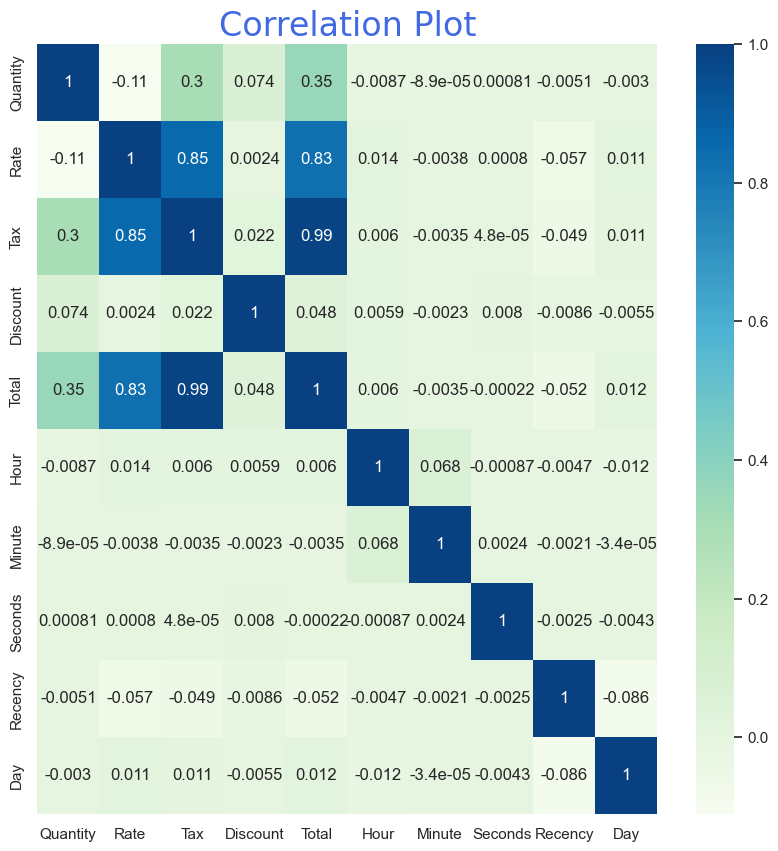

In [17]:
sns.color_palette("Set2")
#plt.title("Correlation Plot",fontdict = Tfont)
fig, ax = plt.subplots(figsize=(10,10)) 
plt.title("Correlation Plot",fontdict = Tfont)
sns.heatmap((df.corr()),annot = True,cmap = 'GnBu',ax=ax)

In [18]:
df.describe(include='object')

,Bill Number,Item Desc,Time,Category,Weekday,Month,HourAP
count,145830,145830,145830,145830,145830,145830,145830
unique,69982,580,36200,8,7,12,22
top,G0490530,NIRVANA HOOKAH SINGLE,22:25:36,FOOD,Saturday,December,8-PM
freq,23,8553,33,57023,25226,14984,13785


In [19]:
summ = df.describe().T

In [20]:
summ

,count,mean,std,min,25%,50%,75%,max
Quantity,145830.0,1.121299,0.477237,1.00,1.00,1.00,1.0,30.00
Rate,145830.0,161.782259,102.244631,0.01,95.00,125.00,225.0,2100.00
Tax,145830.0,48.929061,40.272851,0.00,22.56,32.06,72.0,2731.25
Discount,145830.0,0.095079,3.720735,0.00,0.00,0.00,0.0,825.00
Total,145830.0,224.959852,164.960776,0.01,117.56,167.06,315.0,14231.25
Hour,145830.0,16.325070,5.634004,1.00,13.00,17.00,21.0,24.00
Minute,145830.0,29.366063,17.339664,0.00,14.00,29.00,45.0,59.00
Seconds,145830.0,28.476462,18.953535,0.00,14.00,30.00,45.0,59.00
Recency,145830.0,177.338367,103.828389,0.00,89.00,175.00,264.0,364.00
Day,145830.0,15.872811,8.881345,1.00,8.00,16.00,24.0,31.00


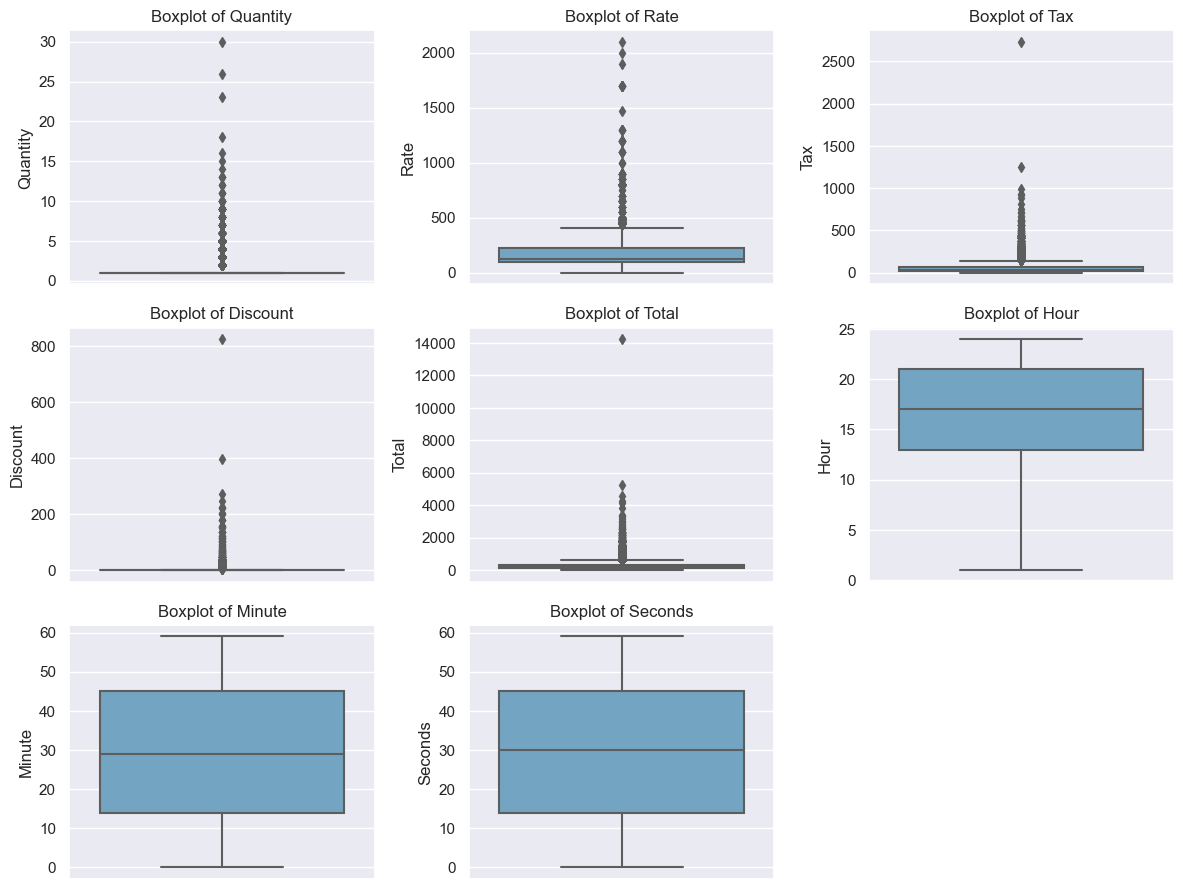

In [22]:
plt.figure(figsize = (12,15))
plt.grid(True)
feature_list = ['Quantity','Rate','Tax','Discount','Total','Hour','Minute','Seconds']
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df,palette='PuBuGn');
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<Axes: title={'center': 'Sales by Billed Weekday'}, xlabel='Weekday', ylabel='Total'>

findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.


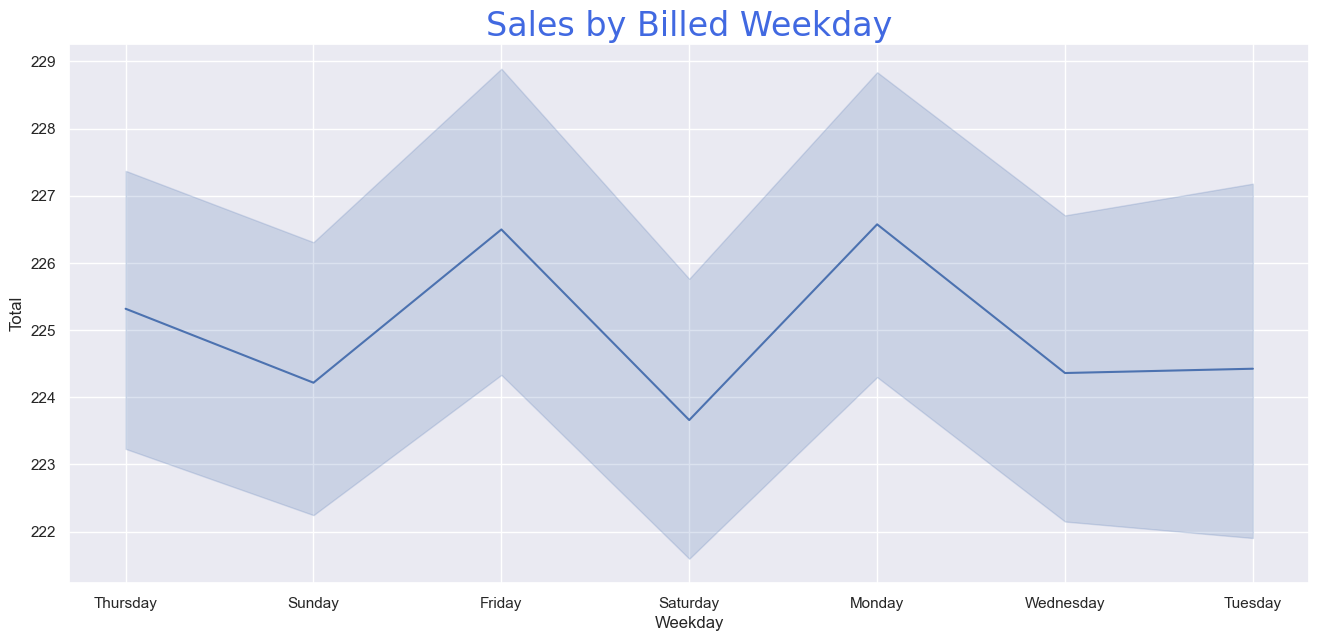

In [25]:
plt.figure(figsize = (16,7))
plt.xticks(rotation=0)
plt.title("Sales by Billed Weekday",fontdict = Tfont)
sns.lineplot(y= df['Total'],x = df['Weekday'],estimator='mean')

<Axes: title={'center': 'Sales by Ordered Month'}, xlabel='Date', ylabel='Total'>

findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.


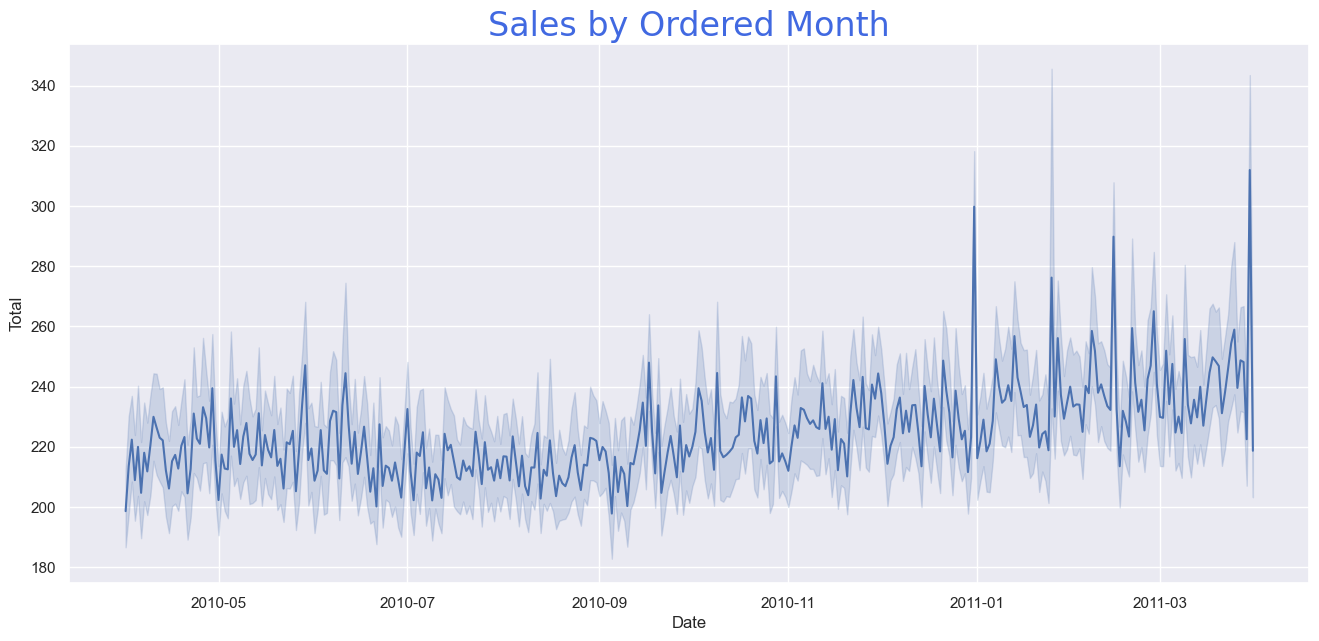

In [26]:
plt.figure(figsize = (16,7))
plt.xticks(rotation=0)
plt.title("Sales by Ordered Month",fontdict = Tfont)
sns.lineplot(y= df['Total'],x = df['Date'],estimator='mean')

In [27]:
df.columns

Index(['Date', 'Bill Number ', 'Item Desc', 'Time', 'Quantity', 'Rate', 'Tax',
       'Discount', 'Total', 'Category', 'Hour', 'Minute', 'Seconds', 'Weekday',
       'Month', 'HourAP', 'Recency', 'Day'],
      dtype='object')

findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.


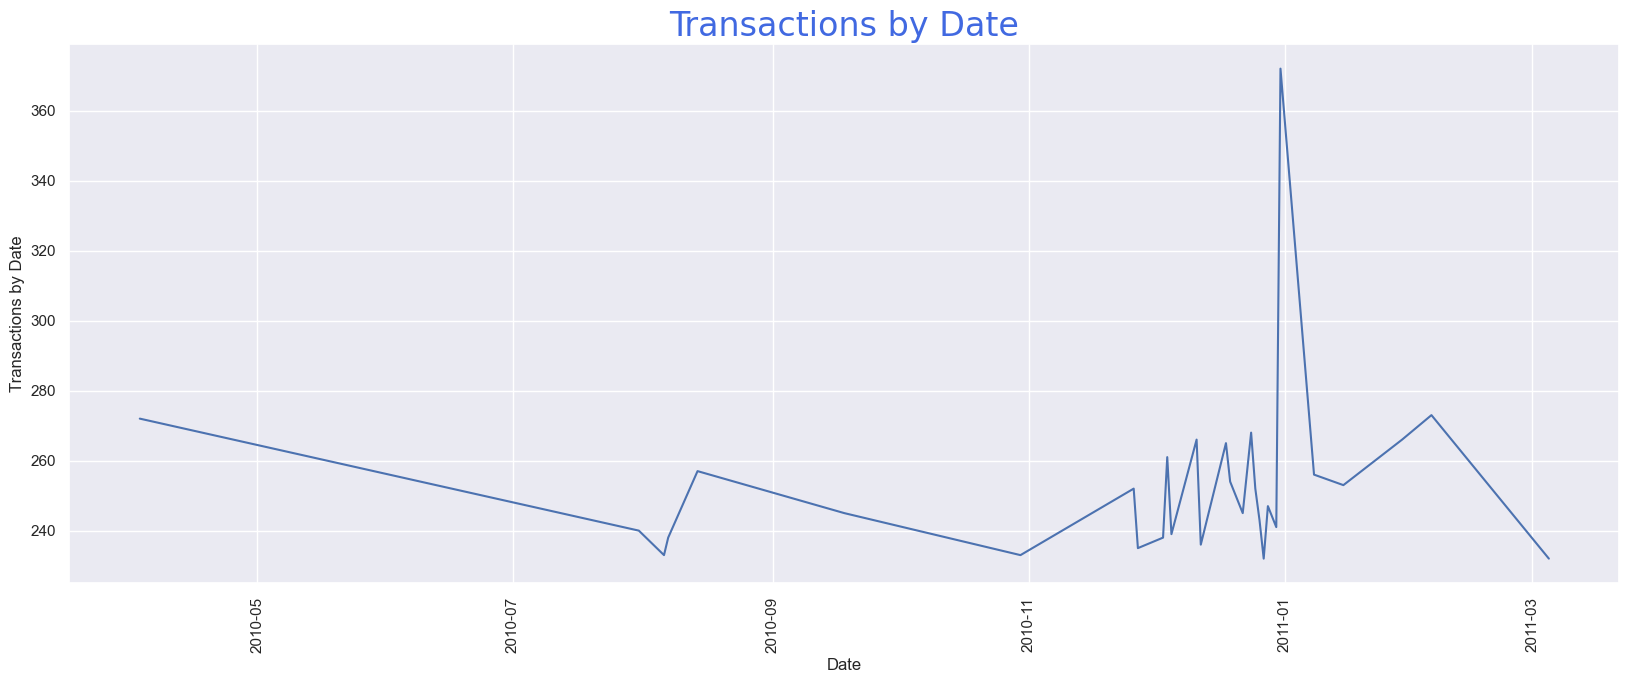

In [24]:
d = pd.DataFrame(df.groupby(by = 'Date',axis= 0,sort = True).nunique()['Bill Number ']).sort_values(by = 'Bill Number ',ascending = False).head(30)
d['Date'] = d.index

plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.title("Transactions by Date",fontdict = Tfont)
sns.lineplot(x="Date", y="Bill Number ", data=d)
plt.ylabel("Transactions by Date");

findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.


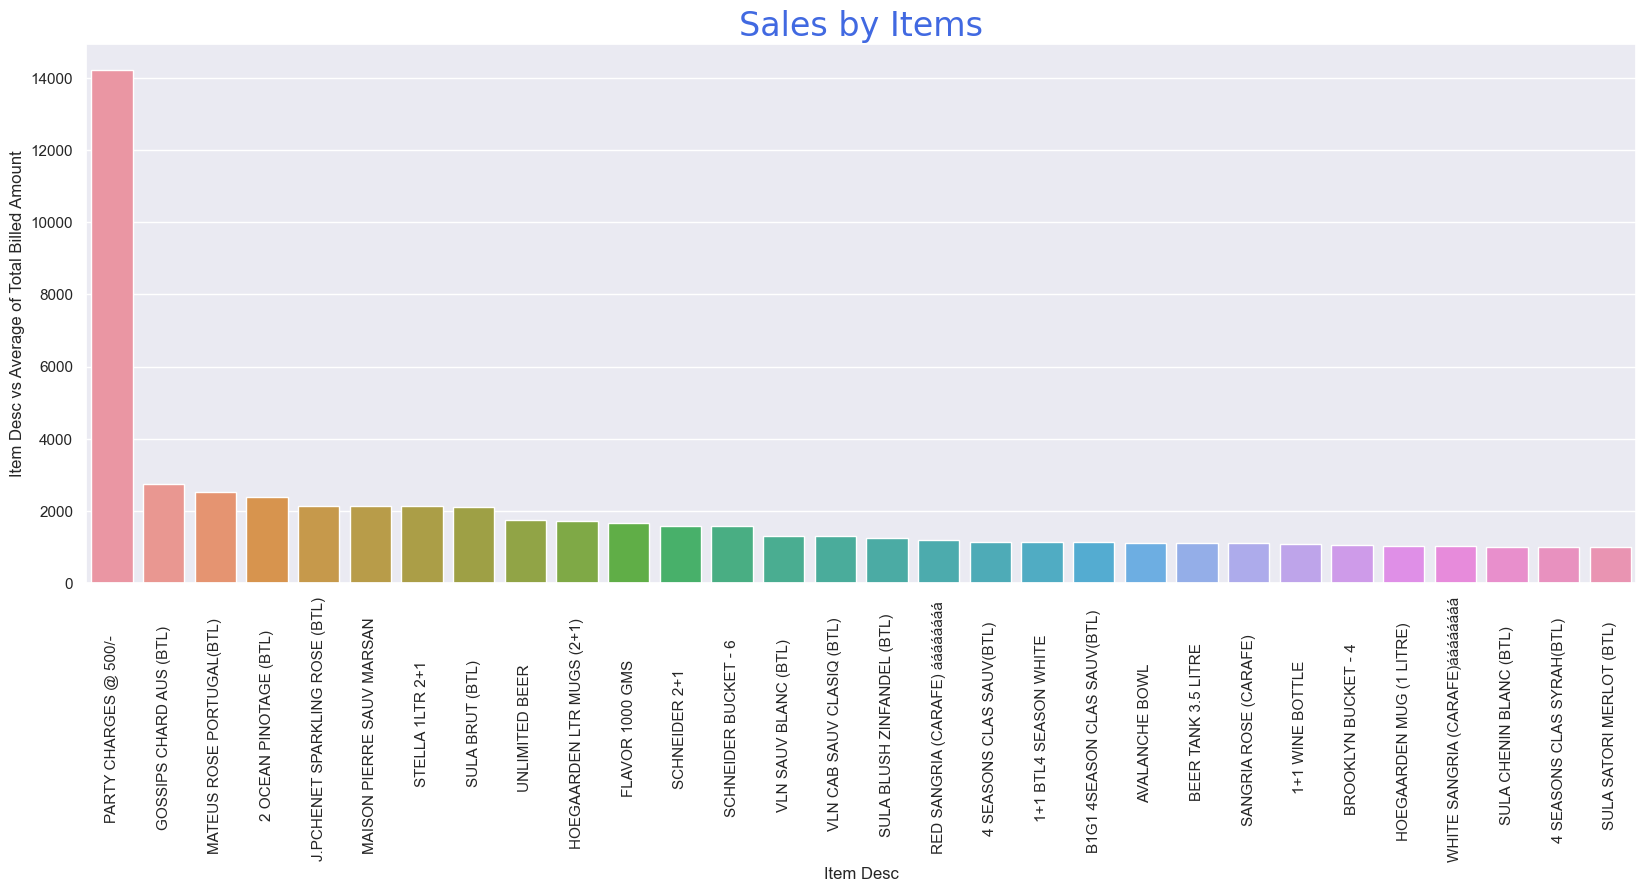

In [27]:
d = pd.DataFrame(df.groupby(by = 'Item Desc',axis= 0,sort = True).mean()['Total']).sort_values(by = 'Total',ascending = False).head(30)
d['Item Desc'] = d.index

plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.title("Sales by Items",fontdict = Tfont)
sns.barplot(x="Item Desc", y="Total", data=d)
plt.ylabel("Item Desc vs Average of Total Billed Amount");

findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.


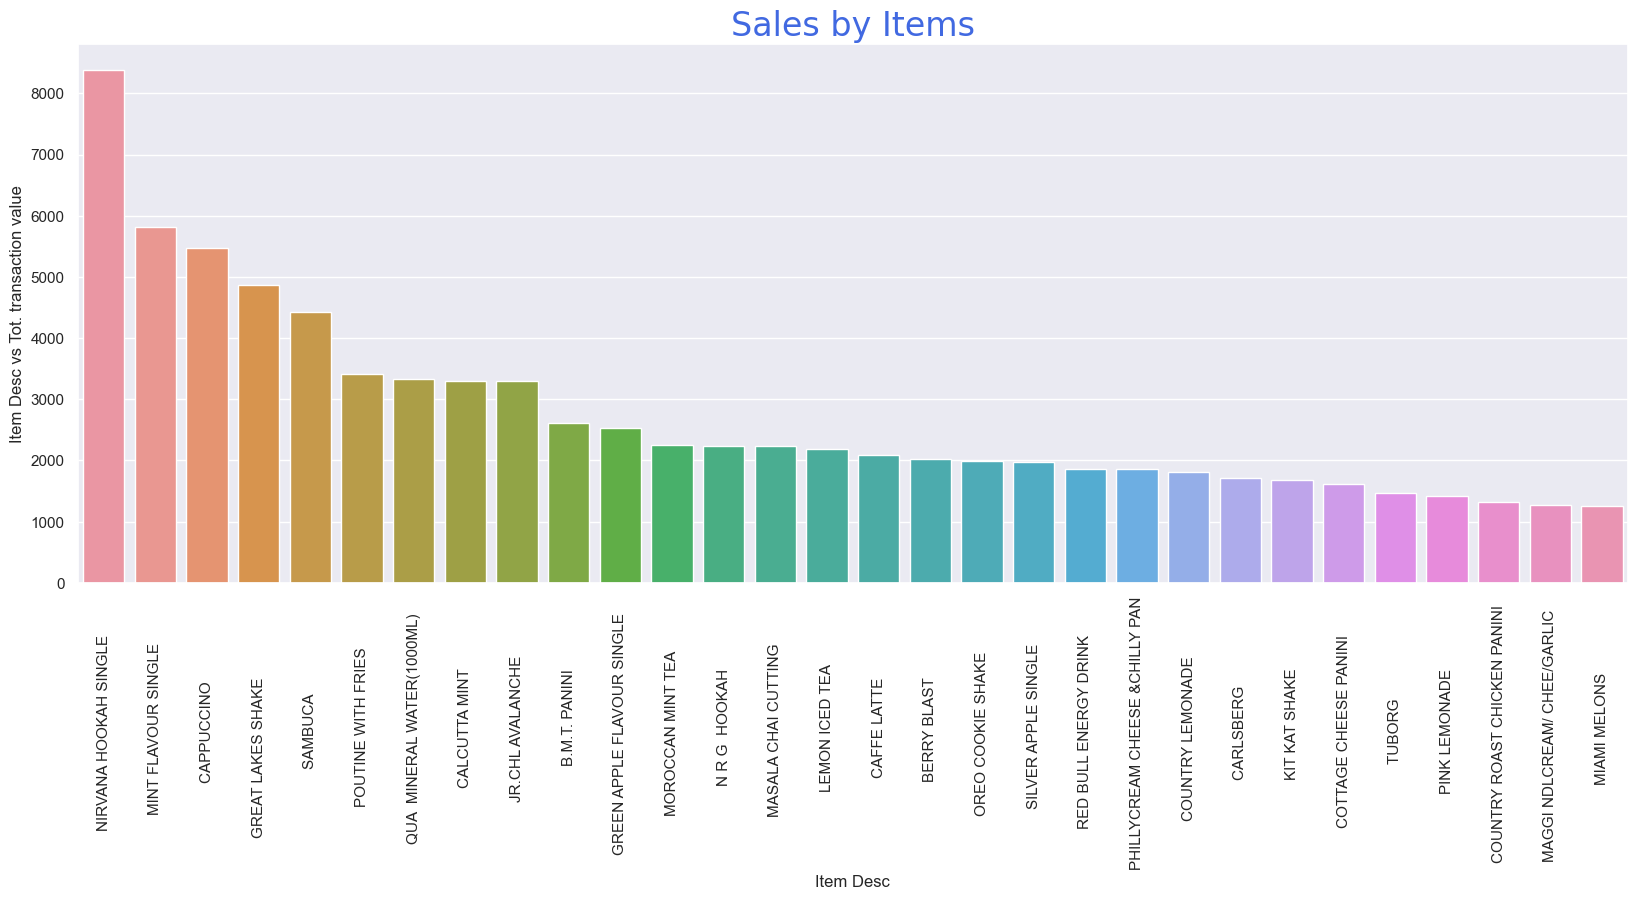

In [28]:
d = pd.DataFrame(df.groupby(by = 'Item Desc',axis= 0,sort = True).nunique()['Bill Number ']).sort_values(by = 'Bill Number ',ascending = False).head(30)
d['Item Desc'] = d.index

plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.title("Sales by Items",fontdict = Tfont)
sns.barplot(x="Item Desc", y='Bill Number ', data=d)
plt.ylabel("Item Desc vs Tot. transaction value");

findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.


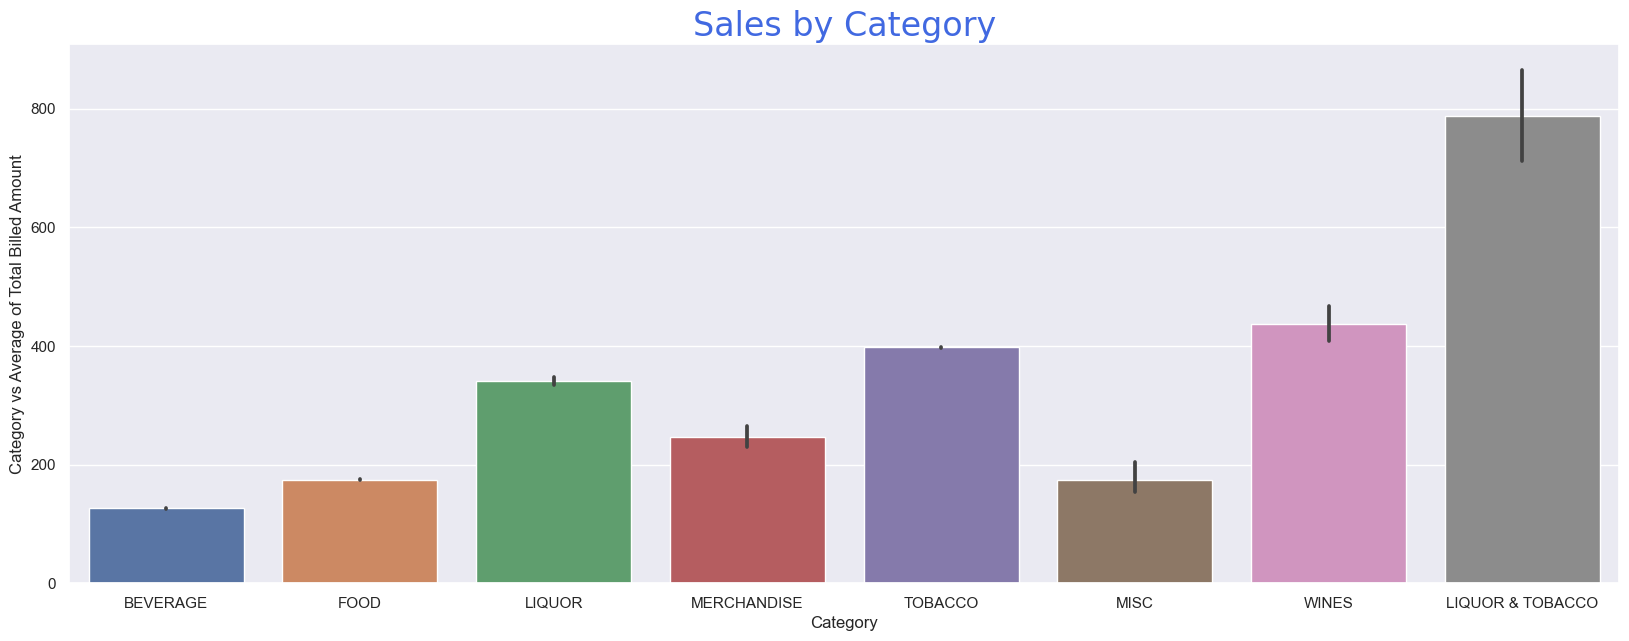

In [30]:
plt.figure(figsize=(20,7))
sns.barplot(x="Category", y="Total", data=df)
plt.title("Sales by Category",fontdict = Tfont)
plt.ylabel("Category vs Average of Total Billed Amount");



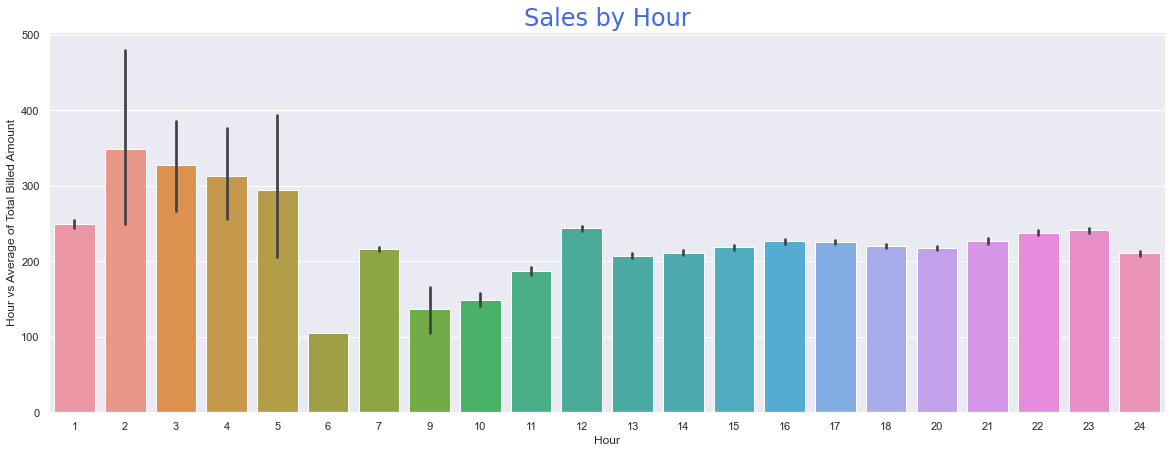

In [31]:
plt.figure(figsize=(20,7))
sns.barplot(x="Hour", y="Total", data=df)
plt.title("Sales by Hour",fontdict = Tfont)
plt.ylabel("Hour vs Average of Total Billed Amount");

# We can infer that most miles are clocked under purpose Meetings follwed by customer visits and Meal'Entertain.

findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.


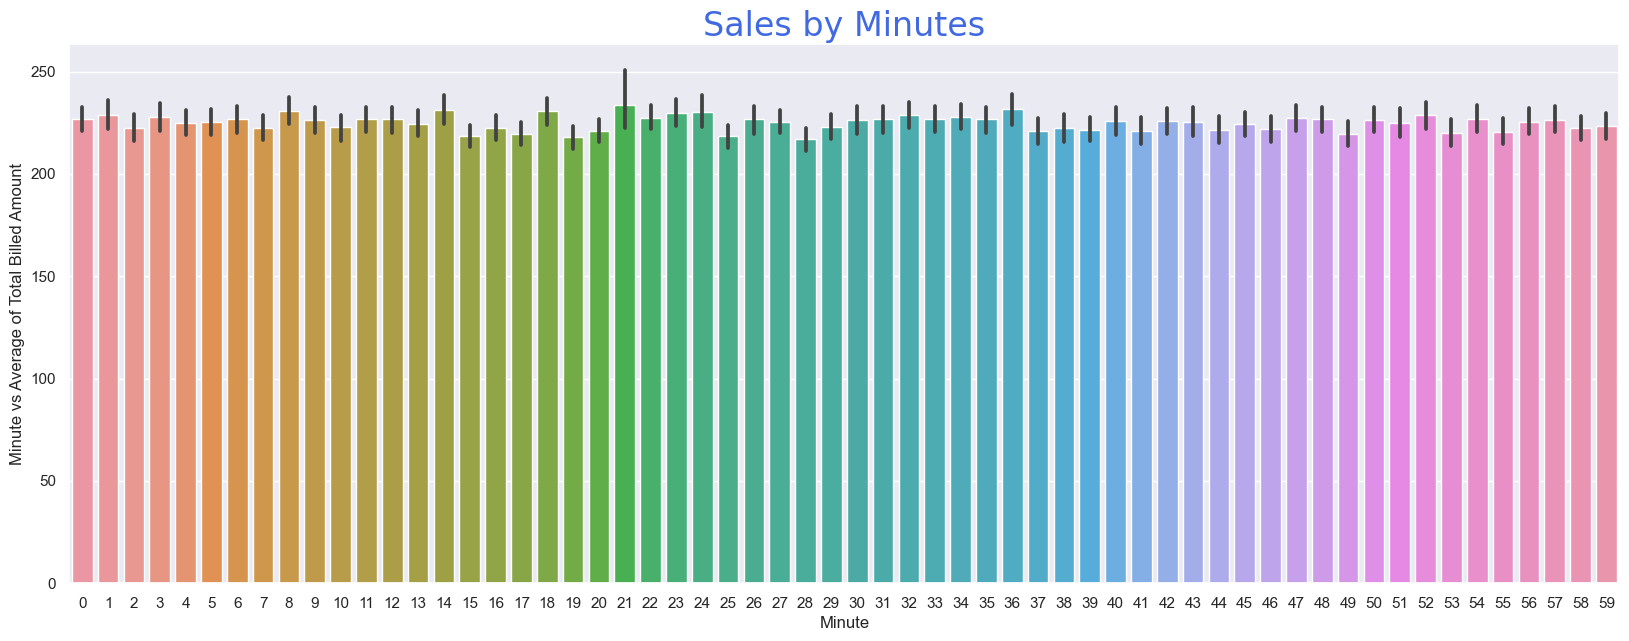

In [31]:
plt.figure(figsize=(20,7))
sns.barplot(x="Minute", y="Total", data=df)
plt.title("Sales by Minutes",fontdict = Tfont)
plt.ylabel("Minute vs Average of Total Billed Amount");

# We can infer that most miles are clocked under purpose Meetings follwed by customer visits and Meal'Entertain.

findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.


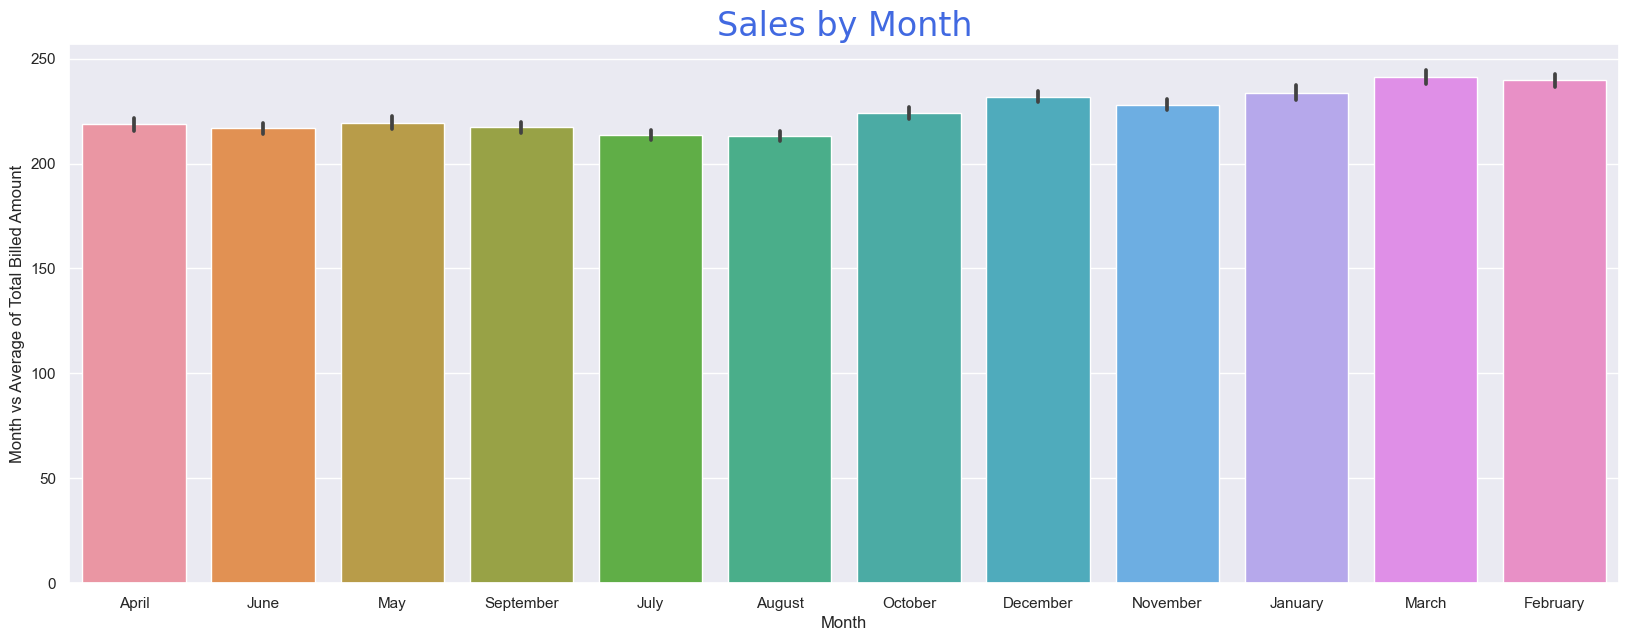

In [25]:
plt.figure(figsize=(20,7))
sns.barplot(x="Month", y="Total", data=df)
plt.title("Sales by Month",fontdict = Tfont)
plt.ylabel("Month vs Average of Total Billed Amount");

# We can infer that most miles are clocked under purpose Meetings follwed by customer visits and Meal'Entertain.

findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.
findfont: Font family 'Didot' not found.


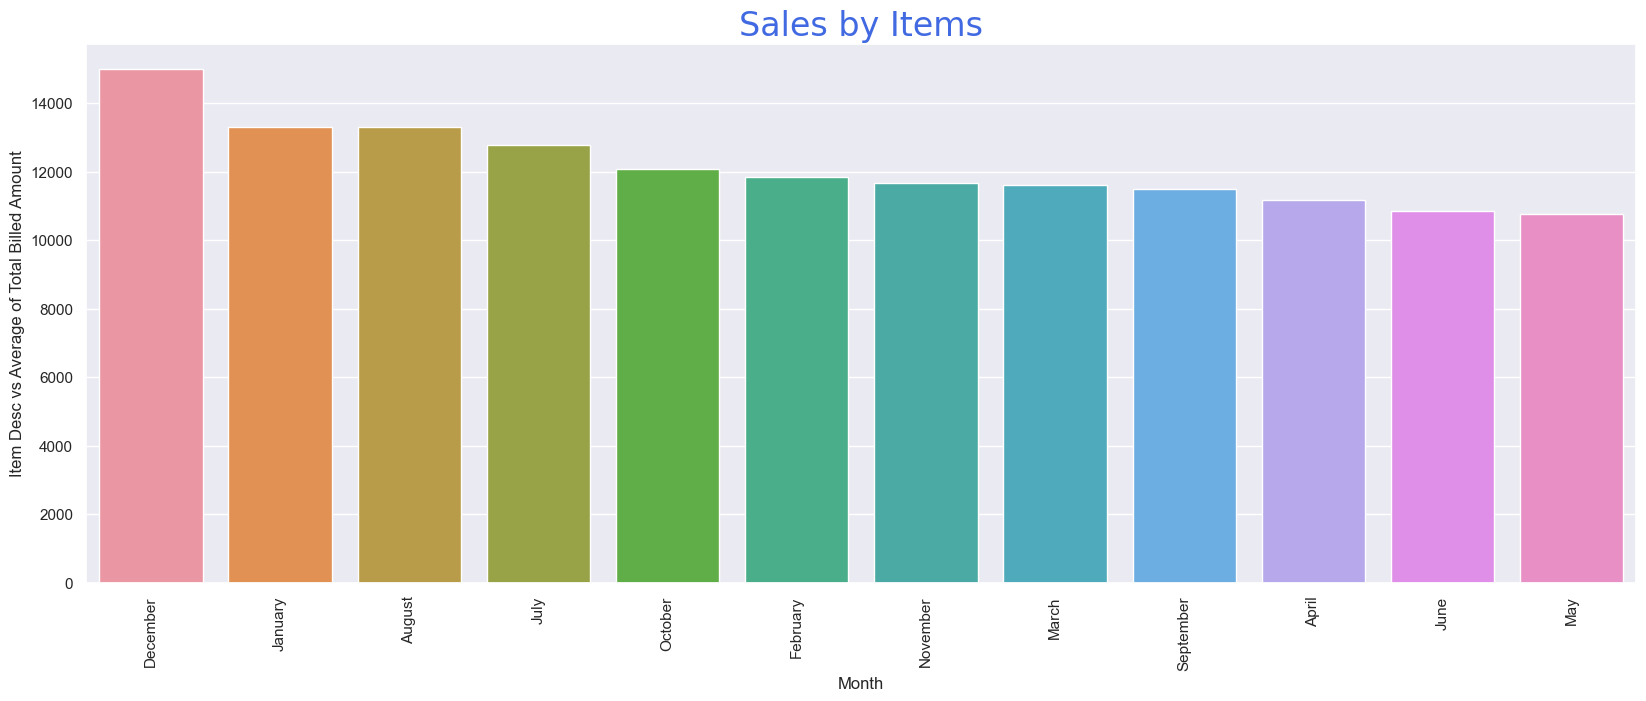

In [32]:
d = pd.DataFrame(df.groupby(by = 'Month',axis= 0,sort = True).count()['Bill Number ']).sort_values(by = 'Bill Number ',ascending = False).head(30)
d['Month'] = d.index

plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.title("Sales by Items",fontdict = Tfont)
sns.barplot(x="Month", y="Bill Number ", data=d)
plt.ylabel("Item Desc vs Average of Total Billed Amount");

<Axes: title={'center': 'Category Wise Unique Bill Numbers '}, xlabel='Category'>

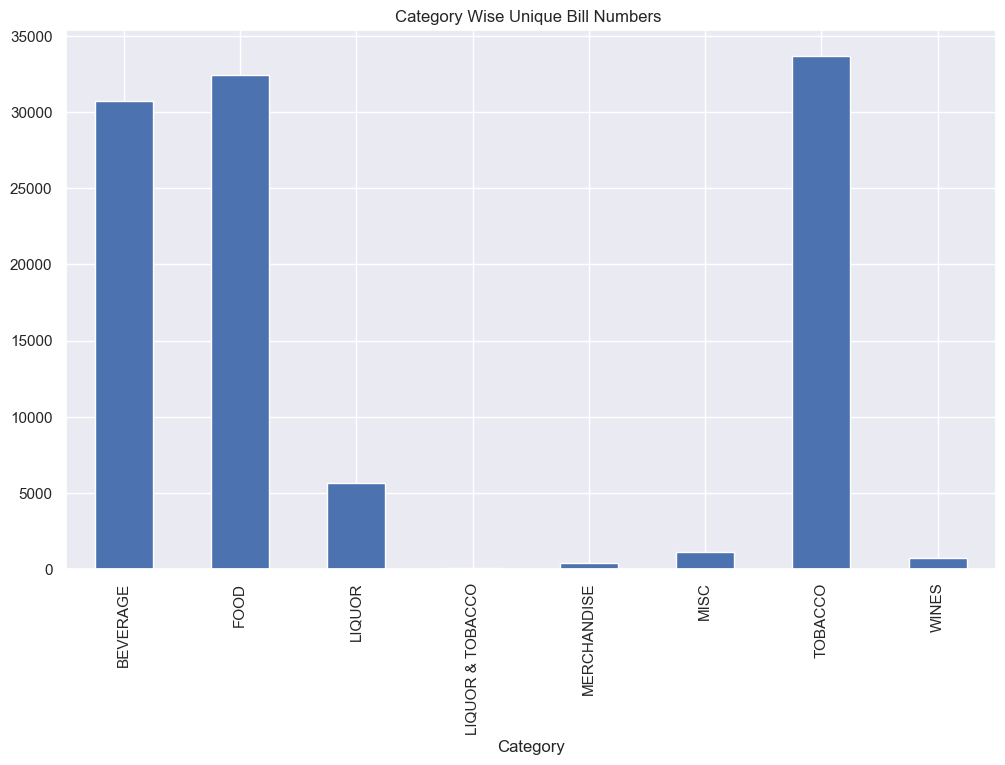

In [33]:
df.groupby(['Category'])['Bill Number '].nunique().plot(kind = 'bar',stacked = True,figsize = (12,7),title = 'Category Wise Unique Bill Numbers ')

<Axes: title={'center': 'Category Wise Sum of Total'}, xlabel='Category'>

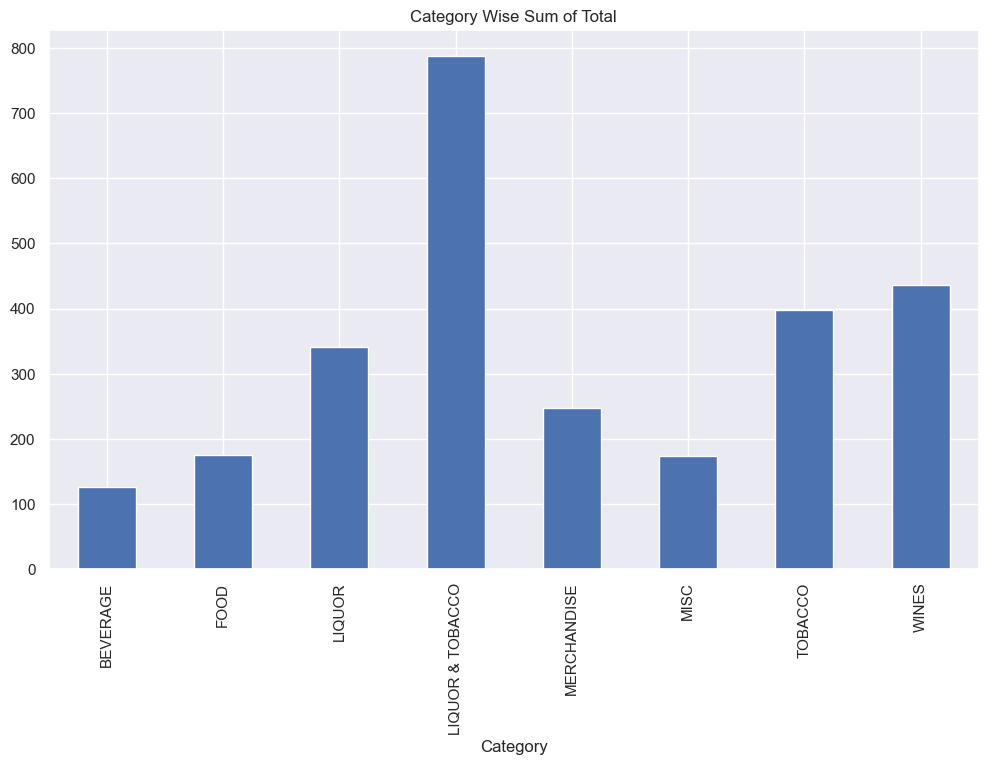

In [34]:
df.groupby(['Category'])['Total'].mean().plot(kind = 'bar',stacked = True,figsize = (12,7),title = 'Category Wise Sum of Total')

<Axes: title={'center': 'Weekday Wise mean of Total'}, xlabel='Weekday'>

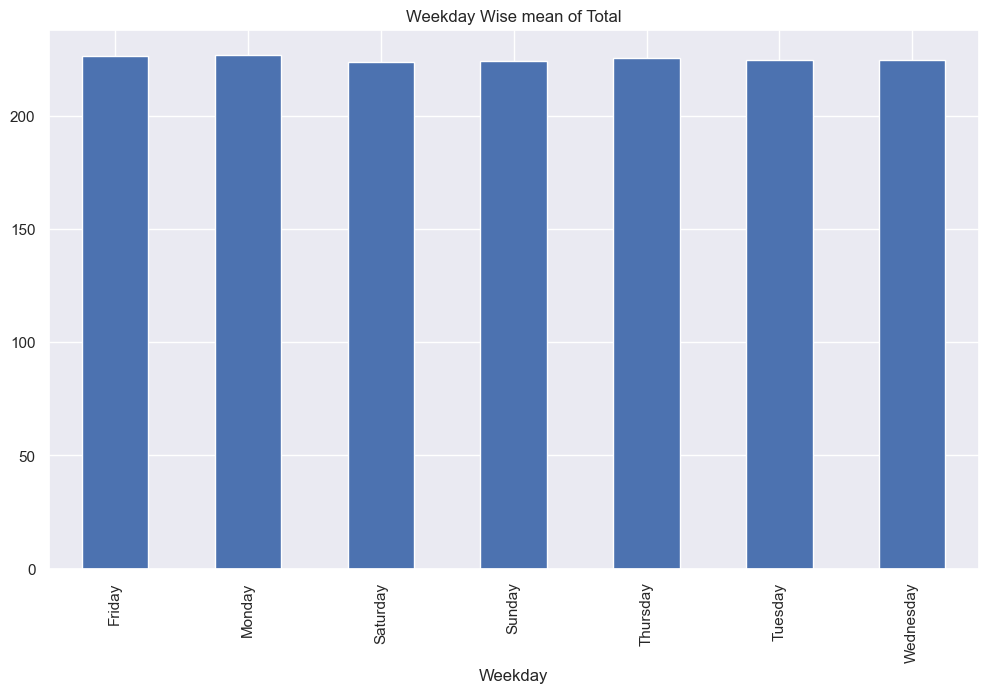

In [35]:
df.groupby(['Weekday'])['Total'].mean().plot(kind = 'bar',stacked = True,figsize = (12,7),title = 'Weekday Wise mean of Total')

<Axes: title={'center': 'Weekday Wise Sum of Total'}, xlabel='Weekday'>

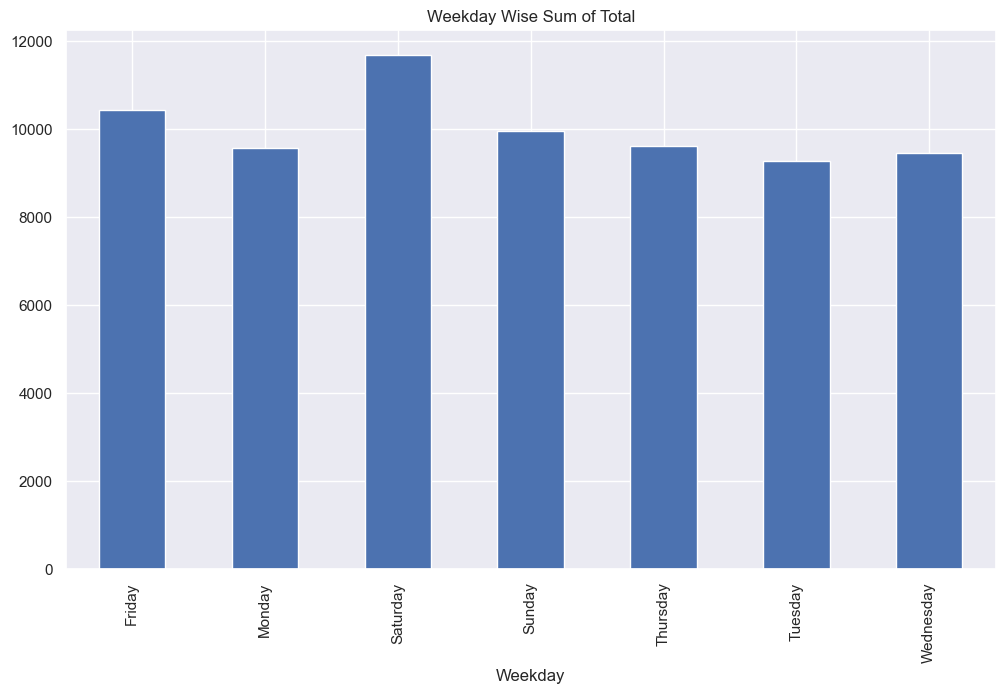

In [36]:
df.groupby(['Weekday'])['Bill Number '].nunique().plot(kind = 'bar',stacked = True,figsize = (12,7),title = 'Weekday Wise Sum of Total')

<Axes: title={'center': 'Day vs Transaction Count'}, xlabel='Day'>

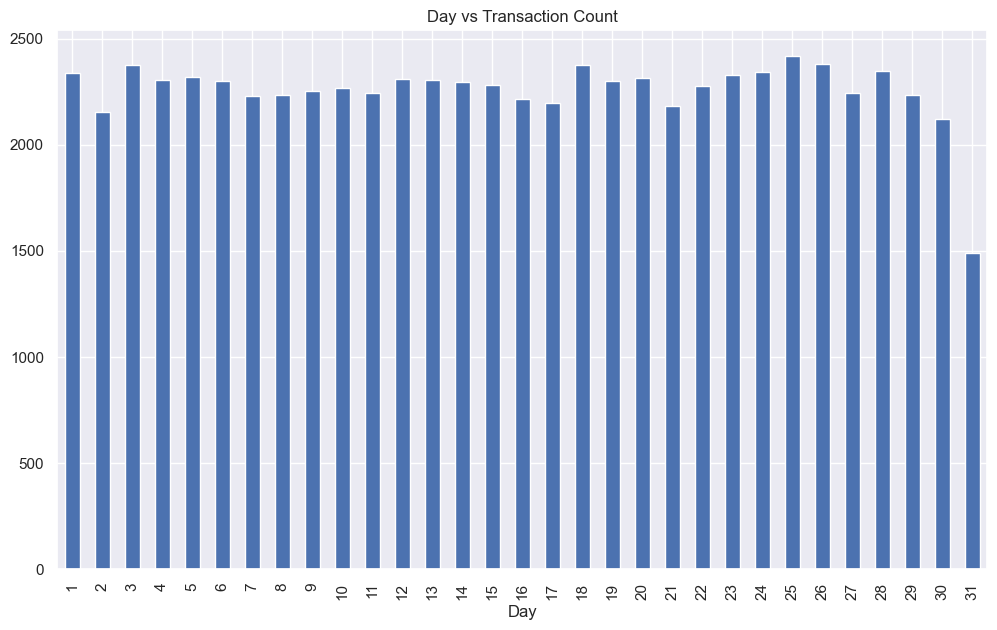

In [37]:
df.groupby(['Day'])['Bill Number '].nunique().plot(kind = 'bar',stacked = True,figsize = (12,7),title = 'Day vs Transaction Count')

<Axes: title={'center': 'Day vs Total Transaction value'}, xlabel='Day'>

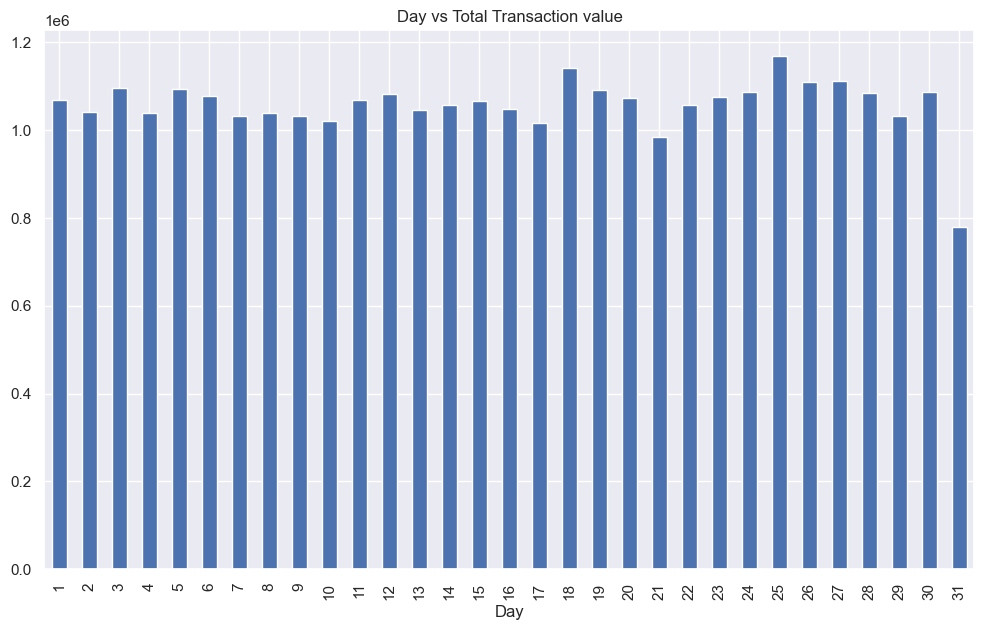

In [30]:
df.groupby(['Day'])['Total'].sum().plot(kind = 'bar',stacked = True,figsize = (12,7),title = 'Day vs Total Transaction value')

<Axes: title={'center': 'Category Wise Sum of Total'}, xlabel='Month'>

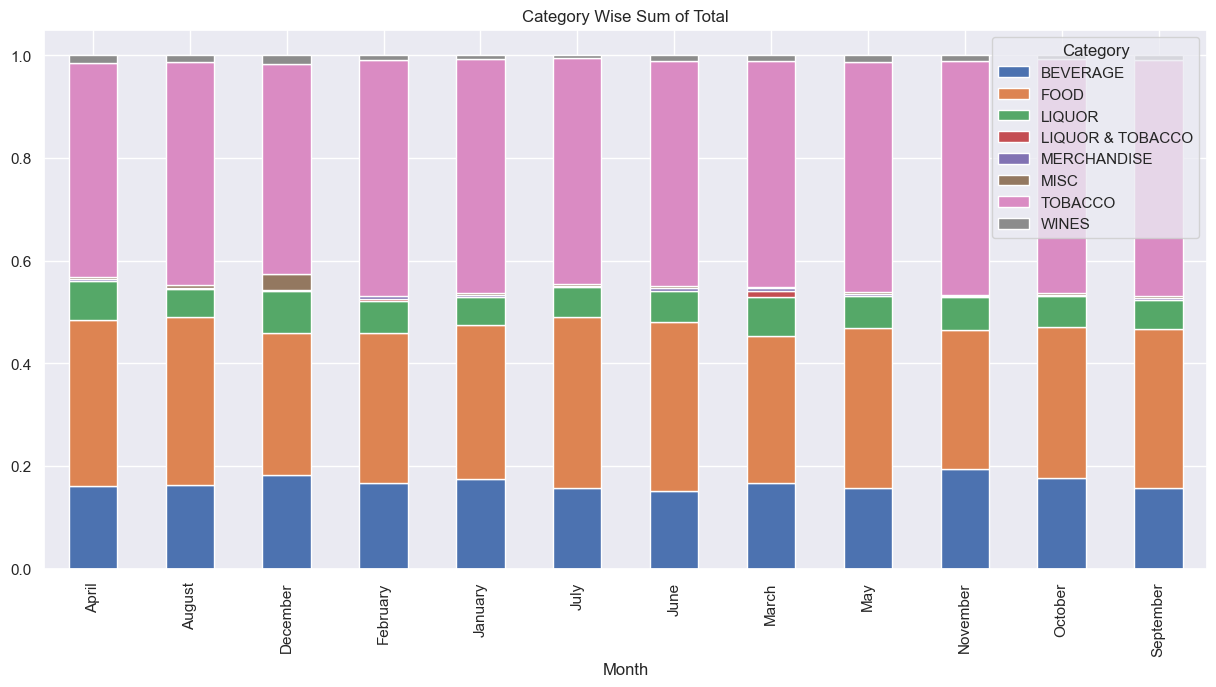

In [39]:
pd.crosstab(df['Month'],df['Category'],values =df['Total'],aggfunc=sum,normalize = 'index').plot(kind = 'bar',stacked = True,figsize = (15,7),title = 'Category Wise Sum of Total')

<Axes: title={'center': 'Category Wise Average of Total'}, xlabel='Hour'>

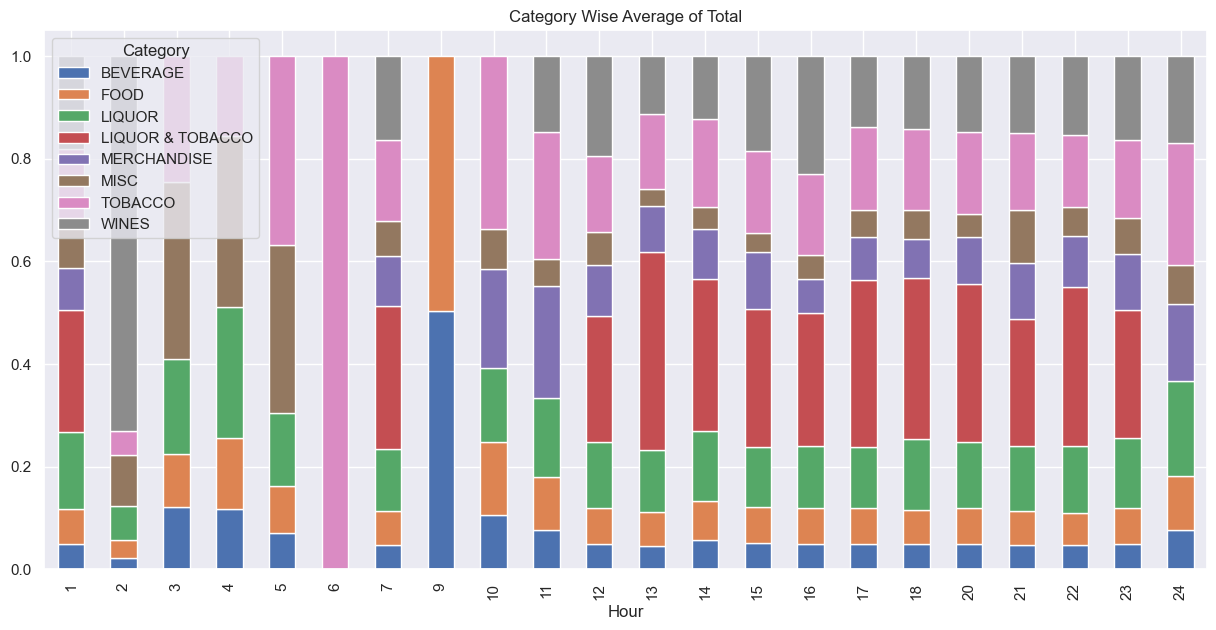

In [40]:
pd.crosstab(df['Hour'],df['Category'],values =df['Total'],aggfunc="mean",normalize = 'index').plot(kind = 'bar',stacked = True,figsize = (15,7),title = 'Category Wise Average of Total')

<Axes: title={'center': 'Category Wise Count of transactions'}, xlabel='Hour'>

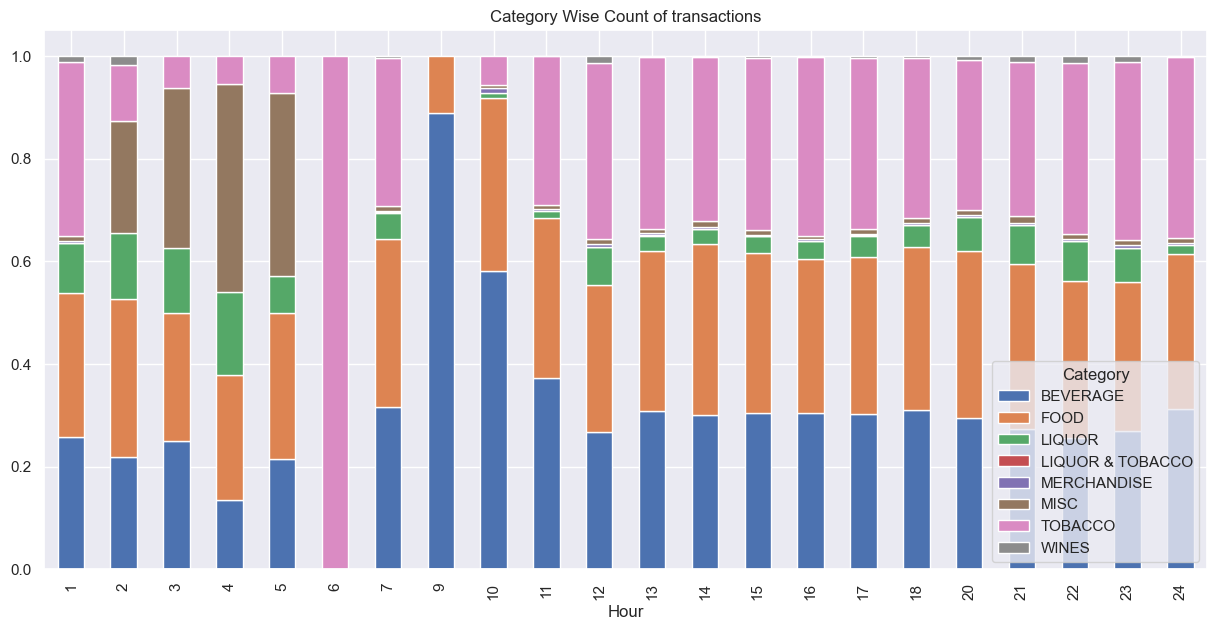

In [41]:
pd.crosstab(df['Hour'],df['Category'],values =df['Bill Number '],aggfunc="nunique",normalize = 'index').plot(kind = 'bar',stacked = True,figsize = (15,7),title = 'Category Wise Count of transactions')

<Axes: title={'center': 'Recency of the Item'}, xlabel='Item Desc'>

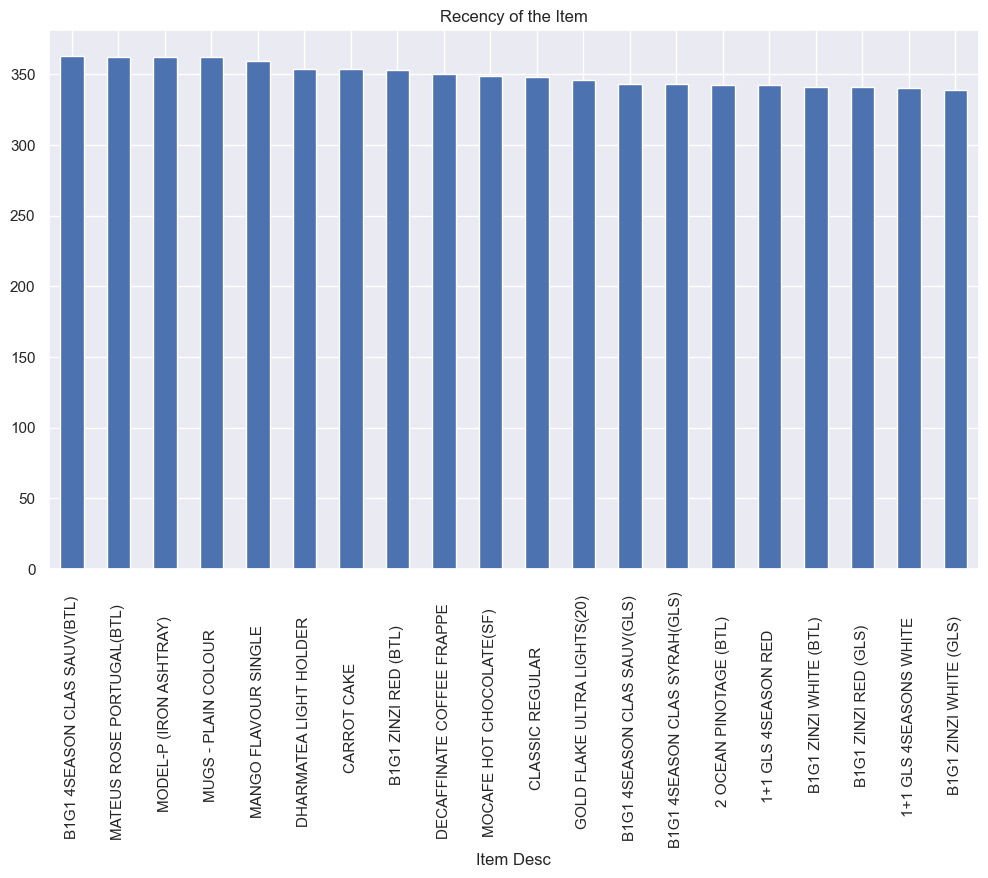

In [29]:
df.groupby(['Item Desc'])['Recency'].min().sort_values(ascending = False).head(20).plot(kind = 'bar',stacked = True,figsize = (12,7),title = 'Recency of the Item')

In [43]:
df.columns

Index(['Date', 'Bill Number ', 'Item Desc', 'Time', 'Quantity', 'Rate', 'Tax',
       'Discount', 'Total', 'Category', 'Hour', 'Minute', 'Seconds', 'Weekday',
       'Month', 'HourAP', 'Recency', 'Day'],
      dtype='object')